### 1.Import Dependencies

In [1]:
import os
import pandas as pd #alias
import numpy as np  #alias
import seaborn as sns
import matplotlib.pyplot as plt 

### 2.Basic processing

In [42]:
df = pd.read_csv('c:\\Users\\Tenura Pinsara\\Desktop\\ML\\Zuu\\mini_p_00\\Advanced_Telco_Customer_Churn_Prediction\\data\\processed\\Churn_Missing_Value_Handled.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
print(f"No of Rows : {len(df)}")

No of Rows : 7043


### 3. Outlier detection techniques

#### 3.1 Distribution plots

In [45]:
categorical_columns = ['gender', 
                       'SeniorCitizen', 
                       'Partner', 
                       'Dependents', 
                       'PhoneService', 
                       'MultipleLines', 
                       'InternetService', 
                       'OnlineSecurity', 
                       'OnlineBackup', 
                       'DeviceProtection', 
                       'TechSupport', 
                       'StreamingTV', 
                       'StreamingMovies', 
                       'Contract', 
                       'PaperlessBilling', 
                       'PaymentMethod']

numerical_columns = ['tenure', 
                     'MonthlyCharges',
                     'TotalCharges']

print(f"Categorical Columns : {len(categorical_columns)}")
print(f"Numerical Columns : {len(numerical_columns)}")

Categorical Columns : 16
Numerical Columns : 3


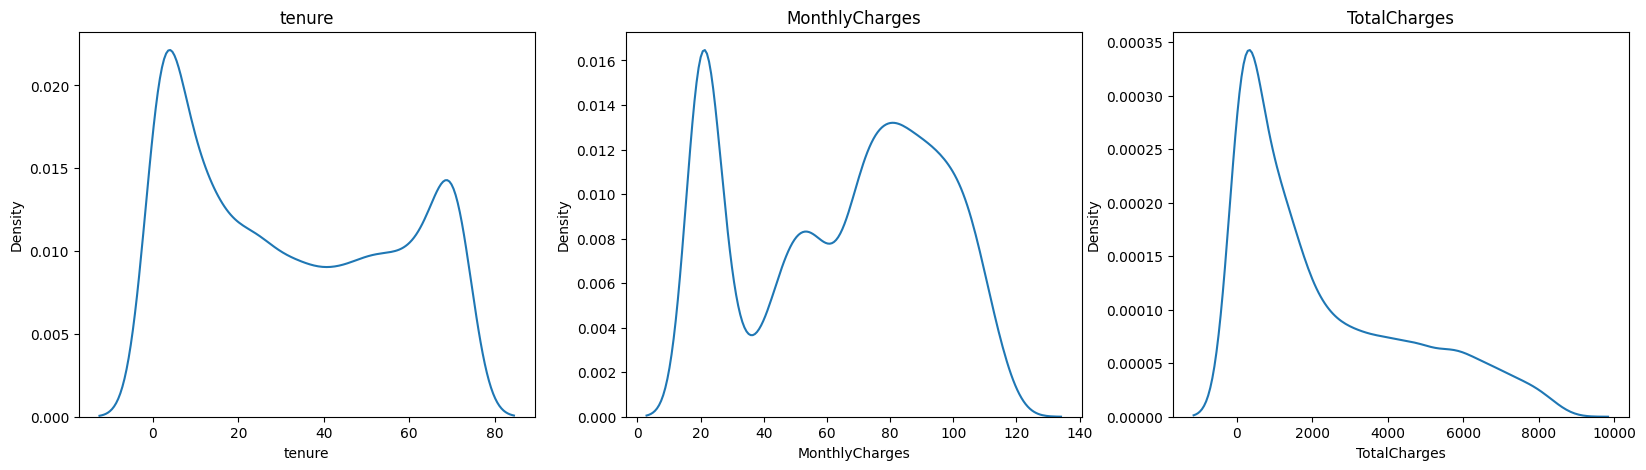

In [48]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
axes = axes.flatten()

for i,col in enumerate(numerical_columns):
    sns.kdeplot(data=df[col],ax=axes[i])
    axes[i].set_title(col)


plt.show()